<a href="https://colab.research.google.com/github/wbfrench1/sklearn/blob/main/src/sklearn_ch_4_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

## Linear Regression Model

$\hat{y} = \theta_0 + \theta_1x_1 + \theta_2x_2 +\dotsb+ \theta_nx_n $
<br><br>

$\hat{y}$ is the predicted value

n is the number of features

x is the $i^{th}$ feature value

$\theta_j$ is the $j^{th}$  model parameter, including the bias term $\theta_0$ and the feature weights $\theta_1$, $\theta_2$, $\dotsc$, $\theta_n$

## Linear Regression Model \(Vectorized Form)

$\mathbf{\hat{y}} = h_\mathbf{θ}(\mathbf{x}) =\mathbf{θ} \cdot \mathbf{x}$

$h_\mathbf{θ}$ is the hypothesis function

$\mathbf{θ}$ is the model's parameter vector, containing the bias term $\theta_0$ and the feature weights $\theta_1$ to $\theta_n$

$\mathbf{x}$ is the instance's feature vector, containing $x_0$ to $x_n$ with $x_0$ always equal to 1


## Performance Metric- MSE cost function for a linear regression model

$\displaystyle MSE(\mathbf{X}, h_\mathbf{\theta})$ = $\frac{1}{m}\displaystyle\sum_{i=1}^{m}(\theta^\intercal\mathbf{x}^{(i)}-y^{(i)})^2$

In [47]:
np.random.seed(42)  # to make the example reproducible
m = 100 # number of instances
X = 2 * np.random.rand(m, 1)  # column vector
y = 4 + 3 * X + np.random.rand(m, 1) # column vector

Text(0, 0.5, 'y')

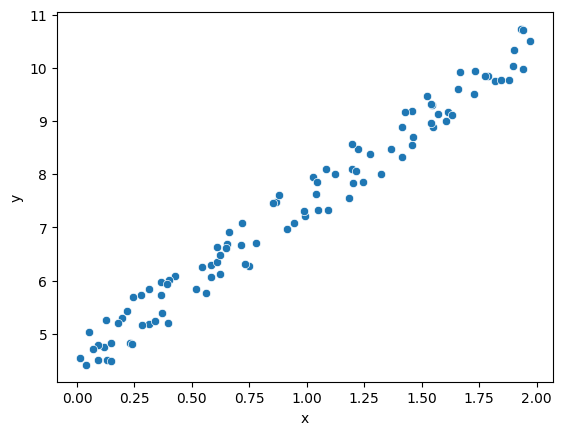

In [48]:
sns.scatterplot(pd.DataFrame(np.concatenate((X,y),axis=1)), x=0, y=1)
plt.xlabel('x')
plt.ylabel('y')